## 1. Exploración y limpieza superficial de los datos

Importamos la librería pandas para poder importar y manejar los datos de un archivo .csv de los hospedajes de Nueva York mediante una url. Nombramos la variable como total_data, que será el nombre que manejaremos a lo largo de todo el análisis. Lo visualizamos bajo la celda para poder realizar nuestras primeras observaciones.

Algo primordial en este tipo de ejercicios es tener claro cuál va a ser el objetivo (o target) a entrenar. Es decir, alrededor de qué variable vamos a tomar las observaciones. Decidimos que sea la variable "price" (el precio). De ahora en adelante nos fijaremos si guarda algún tipo de realción relevante con el resto de columnas que pueda ser determinante para sus características.

In [21]:
import pandas as pd
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Con la funcionalidad .info() podemos observar todos los valores no-nulos según columna, lo que nos permitirá poder valorar si eliminar alguna de ellas ya que pueden carecer de relevancia y ser indeterminantes. En este caso, el número de ceros de la columna no será lo que nos conduzca a eliminar una columna.

In [22]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Visualizamos en la consola la contraparte al punto anterior, en la que nos muestra la cantidad de N/A por columna. Nos interesaría, en este caso, eliminar toda fila cuyo precio sea cero, pero según estas acciones, no sería necesario.

In [23]:
na_por_columna = total_data.isna().sum()

print(f'NA por columna:\n{na_por_columna}')

NA por columna:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Imprimimos las filas y columnas del Data Frame.

In [24]:
total_data.shape

(48895, 16)

En este punto vamos a definir un número de columnas como no relevantes para este estudio. Este paso se realiza de forma subjetiva tratando de ser lo más objetivos posible.

Conideramos que los id's, tanto de huéspedes como de anfitriones, como sus nombres, no tienen en absoluto ninguna relevancia a la hora de determinar el precio de las localidades. También decidimos eliminar la columna de "last_review", ya que tampoco vemos cómo puede tener alguna importancia en cuanto al target.

In [25]:
total_data.drop(["id", "name",  "host_id",  "host_name", "last_review"], axis = 1, inplace = True)
total_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## 2. Análisis uni-variante

Una vez hecha ya la limpieza de nuestros datos, estamos preparados para continuar hacia la siguiente fase. Esta fase se caracteriza por mostrar los datos de forma visual, sirviéndonos de las librerías "Matplotlib" y "Seaborn". 

El que sea un análisis univariante implica precisamente eso, que se estudian las variables en sí mismas, una por una. Es nuestro deber escoger el tipo de diagrama que escogeremos según el tipo de variable que sea: categórica o numérica; y por otra parte el número de items que contenga también puede influir sobre la decisión de nuestrea elección de diagrama.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

Los histogramas suelen ser una gran elección para este tipo de problemáticas ya que disponen visualmente la información de una forma muy cómoda y fácil de entender. De este modo puedes ver enseguida cuántos items diferentes hay por columna y sus cantidades.

Sin embargo, en las columnas "minimum_nights" y "calculated_host_listings", nos encontramos con una lista muy larga de items por columna con una gran concentración en un solo punto. Por lo tanto, es interesante en estos casos disponer un boxplot, para ver dónde se halla la concentraciñon de la mayor parte de los casos y las ubicaciones de los puntos que difiren a esta, incluso pudiendo llegar a identificar si hubiese algún outlier.

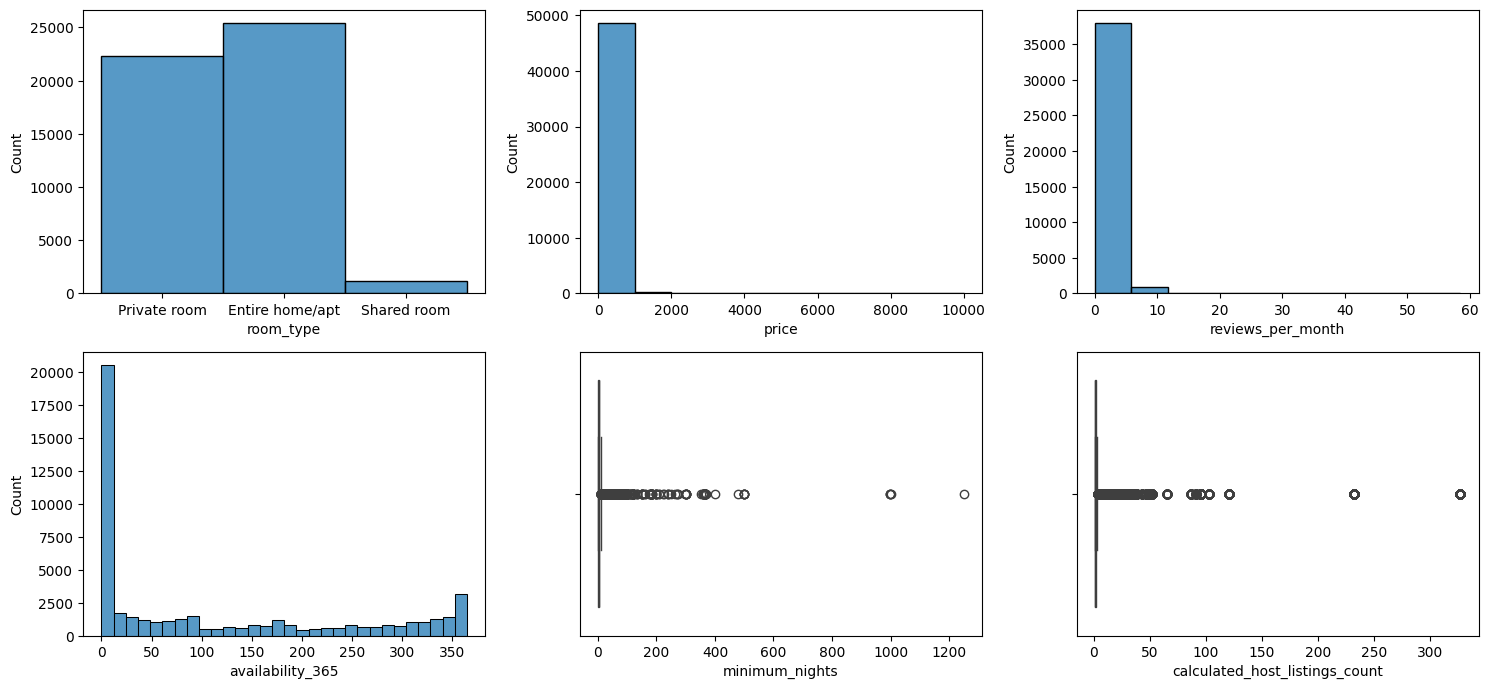

In [27]:
fig, axis = plt.subplots(2,3, figsize = (15,7))


sns.histplot(data = total_data, x ="room_type", ax = axis[0,0])
sns.histplot(data = total_data, x ="price", ax = axis[0,1], bins = 10)
sns.histplot(data = total_data, x ="reviews_per_month", ax = axis[0,2], bins = 10)
sns.histplot(data = total_data, x ="availability_365", ax = axis[1,0])
sns.boxplot(data = total_data, x ="minimum_nights", ax = axis[1,1])
sns.boxplot(data = total_data, x ="calculated_host_listings_count", ax = axis[1,2])


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Después de haber probado varias columnas con diferentes tipos de diagramas, decidimos quedarnos con los arriba dispuestos. Las observaciones que podemos realizar a grandes rasgos, nos muestran que muchas variablese están concentradas en su mayoría en un rango muy pequeño de valores. Eso por un lado. Por otro lado podemos apreciar que en los "room_types" los "Shared Room" son significantemente más escasos que los demás tipos de habitación, lo cual podemos tener en cuenta para futuras apreciaciones.

A continuación agrupamos por simple hecho práctico las variables "neighbourhood_group" y "neighbourhood" en una celda aparte. Por un lado no queremos tener tantos gráficos acumulados y por otro lado pensamos que puede llegar a ser interesante tener una comparación directa de ambos diagramas.

/tmp/ipykernel_54192/4246179745.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=320)


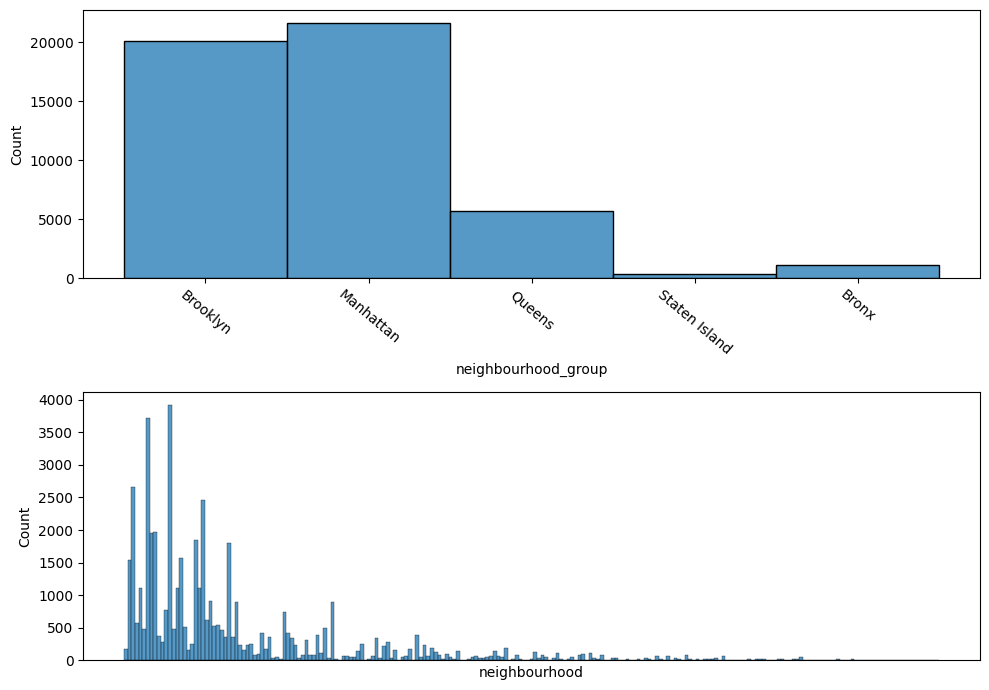

In [28]:
fig, axis = plt.subplots(2, figsize = (10, 7))

sns.histplot(data = total_data, x ="neighbourhood_group", ax = axis[0])
axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=320)
sns.histplot(data = total_data, x ="neighbourhood", ax = axis[1])

# Ocultamos los xticks ya que serían ilegibles dado a su gran número
axis[1].set_xticks([])



plt.tight_layout()
plt.show()


Claramente Brooklyn y Manhattan encierran el grueso de los items del Data Frame, mientras que las demás aportan modestamente a la lista de hospedajes de Airbnb. En el caso de los barrios más pequeños podemos apreciar también mayor concentración en unos pocos, es decir una distribución asimétrica.

En este punto hemos finalizado el análisis gráfico univariante. Vemos importante ordenar el precio de forma descendente para que las variables aparezcan en ese mismo orden en futuros análisis. 

In [29]:
total_data = total_data.sort_values(by='price', ascending=False)

Vemos conveniente factorizar con pandas.factorize() todas las variables a numéricas, para de este modo poder compararlas en el siguiente paso. 

In [30]:
codes_rt, uniques_rt = pd.factorize(total_data["room_type"], use_na_sentinel=False)
print(uniques_rt)
total_data["room_type_num"] = codes_rt

codes_ng, uniques_ng = pd.factorize(total_data["neighbourhood_group"], use_na_sentinel=False)
print(uniques_ng)
total_data["neighbourhood_group_num"] = codes_ng

codes_n, uniques_n = pd.factorize(total_data["neighbourhood"], use_na_sentinel=False)
print(uniques_n)
total_data["neighbourhood"] = codes_n

total_data.head()

Index(['Private room', 'Entire home/apt', 'Shared room'], dtype='object')
Index(['Queens', 'Brooklyn', 'Manhattan', 'Staten Island', 'Bronx'], dtype='object')
Index(['Astoria', 'Greenpoint', 'Upper West Side', 'Lower East Side',
       'East Harlem', 'Tribeca', 'Clinton Hill', 'Upper East Side',
       'Battery Park City', 'East Flatbush',
       ...
       'Woodlawn', 'Emerson Hill', 'Arden Heights', 'Bull's Head',
       'Silver Lake', 'Co-op City', 'Grant City', 'Richmondtown', 'Rossville',
       'New Dorp'],
      dtype='object', length=221)


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_num,neighbourhood_group_num
9151,Queens,0,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0,0,0
17692,Brooklyn,1,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0,1,1
29238,Manhattan,2,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,1,83,1,2
40433,Manhattan,3,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,1,365,1,2
12342,Manhattan,3,40.71355,-73.98507,Private room,9999,99,6,0.14,1,83,0,2


## 3. Análisis multi-variante

Aquí veremos como se comportan las variables entre ellas y de dos en dos. Por la naturleza de nuestro objetivo compararemos mayormente las vatiables con "price" para ver cómo se comportan y si tienen algún tipo de relación significativa. Para ello, igual que en el análisis anterior, usaremos "Seaborn" y "Matplotlib". 

Un diagrama muy eficaz para estos casos es el llamado "regplot" ya que te combina un diagrama de dispersión con una derivada que te muestra la relación a simple vista. Otro recurso interesante son los mapas de calor, que con un número del -1.00 al 1.00 te devuelve un valor de correlación. 

Tras ejecutar el código y a simple vista podemos observar unos cuantos detalles, relacionados con los outliers. Vemos que en "Queens" la mayoría de precios se encuentran en una media relativamente baja pero que en su máximo valor compite en la zifra de 1000 con Manhattan y Brooklyn. Otro caso destacable se encuentra en "reviews_per_month" dónde hay un punto en torno al valor 60. Sesenta reseñas al mes es, sin luegar a duda, una cantidad cuanto menos sospechosa, por razones obvias (un mes tiene 30 días). Además, mirando la comparación con la disponibilidad 365 días, podemos entrever que ni siquiera está constantemente ocupado. Seguramente se trate de un error o de un engaño.

Aparte de ello no contemplamos ninguna relación relevante hacia el precio. Como señalamos antes, el Data Frame fue ordenado con precio descendente y es por ello que el gráfico de neighbourhood se vea también de manera descendente. 

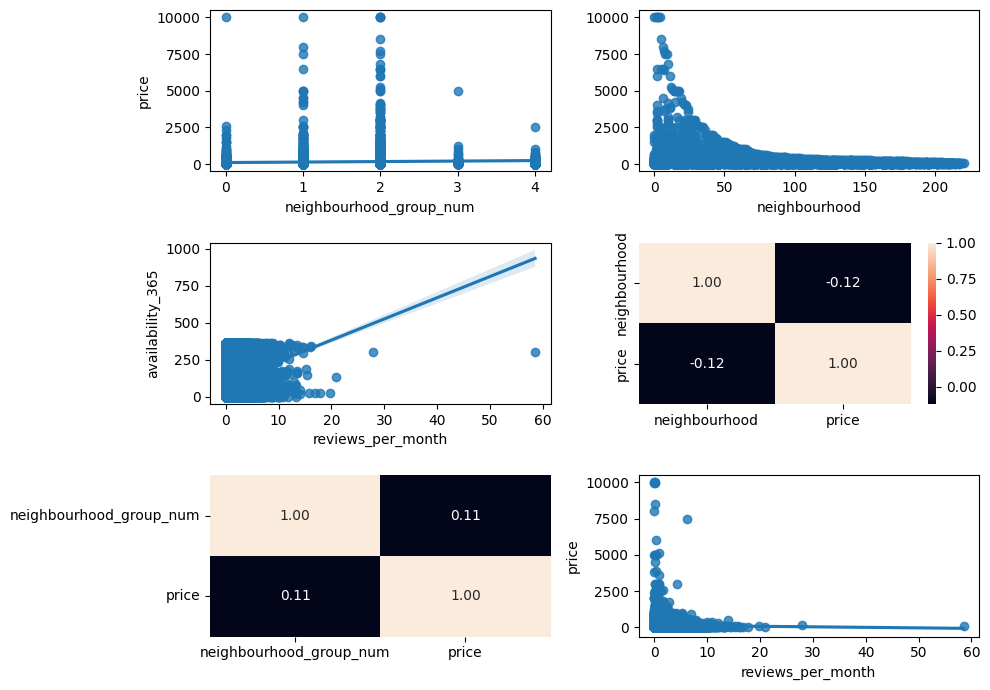

In [31]:
fig, axis = plt.subplots(3, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "neighbourhood_group_num", y = "price")
sns.heatmap(total_data[["neighbourhood_group_num", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[2, 0], cbar = False)
sns.regplot(ax = axis[1, 0], data = total_data, x = "reviews_per_month", y = "availability_365")
sns.regplot(ax = axis[0, 1], data = total_data, x = "neighbourhood", y = "price").set(ylabel=None)
sns.heatmap(total_data[["neighbourhood", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(data = total_data, x = "reviews_per_month", y = "price", ax = axis [2,1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Si disponemos de los valores de longitud y latitud, es interesante darles los valores de x e y en un diagrama de dispersión. Como. en este caso, podemos incluso identificar la silueta geográfica de los distritos en cuestión. 

Sobre este diagrama podemos pedir que se nos muestre una tercera variable en escala de intensidades. En este caso probamos con unas cuantas y nos quedamos con las 4 que consideramos podían tener mayor relevancia.

En el caso del precio podemos observar lo que a priori podíamos imaginarnos: Manhattan tiene los hospedajes más caros de todos. Lo cual también conlleva, según lo dispuesto en los gráficos, un mayor número de anfitriones. La división por grupo de barrio la disponemos para simplemente ver rápidamente las fronteras entre ellos. Ya por último encontramos en Manhattan nuestro valor de 60 reseñas mensuales que hemos detectado en el apartado anterior.

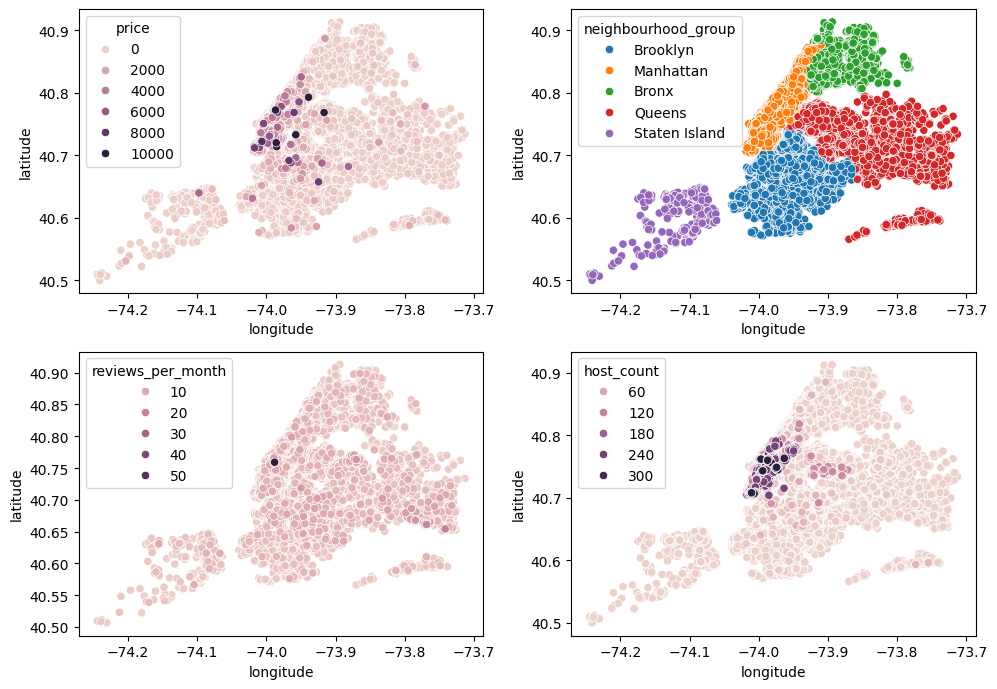

In [32]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

data_sorted = total_data.sort_values(by="price") 
data_sorted2 = total_data.sort_values(by="reviews_per_month") 
data_sorted3 = total_data.sort_values(by="calculated_host_listings_count") 

sns.scatterplot(ax = axis[0, 0], data = data_sorted, x = "longitude", y = "latitude", hue = "price")
sns.scatterplot(ax = axis[0, 1], data = data_sorted, x = "longitude", y = "latitude", hue = "neighbourhood_group")
sns.scatterplot(ax = axis[1, 0], data = data_sorted2, x = "longitude", y = "latitude", hue = "reviews_per_month")
sns.scatterplot(ax = axis[1, 1], data = data_sorted3, x = "longitude", y = "latitude", hue = "calculated_host_listings_count")
axis[1,1].legend(loc='upper left', title = "host_count")
# sns.regplot(ax = axis[0, 1], data = total_data, x = "neighbourhood", y = "price").set(ylabel=None)
# sns.heatmap(total_data[["neighbourhood", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Vamos a seguir relacionando más de dos variables para observar si hubiese algo reseñable.

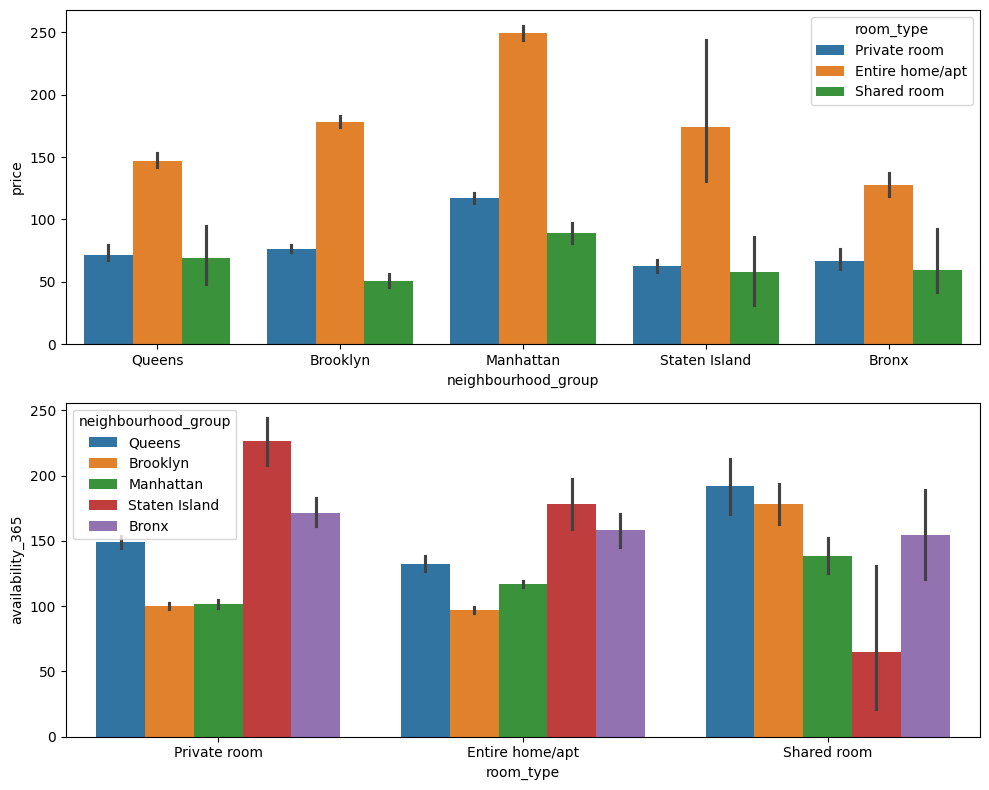

In [33]:
fig, axis = plt.subplots(2, figsize = (10,8))
sns.barplot(data = total_data, x ="neighbourhood_group", y ="price", hue = "room_type", ax = axis[0])
sns.barplot(data = total_data, x ="room_type", y ="availability_365", hue = "neighbourhood_group", ax = axis[1])


plt.tight_layout()
plt.show()

Que los apartamentos enteros de Brooklyn y Manhattan sean los más caros no nos sorprende. Sin embargo que las habitaciones compartidas de Brooklyn sean las más baratas de todo el DataSet, sí que es recalcable.

Observando el segundo de los gráficos, Staten Island es quien lidera, por arriba o por abajo, el ranking en disponibilidad. Se ve que las habitaciones compartidas de Staten Island son las más cotizadas de todas.

En el siguiente paso introudcimos todas nuestras variables numéricas en un mapa de calor para poder ver todas las correlaciones y sacar conclusiones finales.

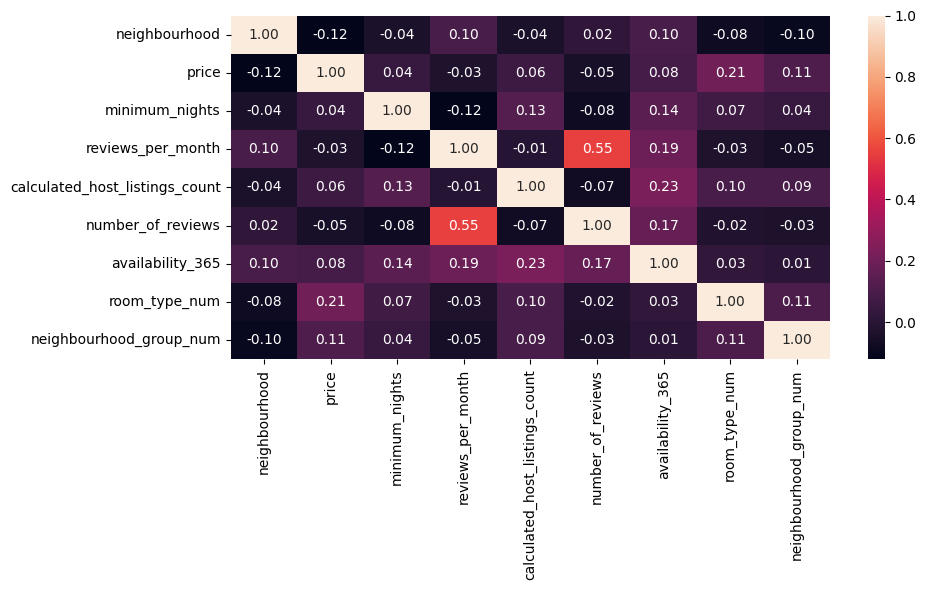

In [34]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["neighbourhood", "price", "minimum_nights", "reviews_per_month", "calculated_host_listings_count","number_of_reviews", "availability_365", "room_type_num", "neighbourhood_group_num"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

En general no hay ninguna correlación grande en todo el conjunto de datos. La mayor que hay a 0.5 la encontramos en la relación entre el número de reseñas y las reseñas mensual, lo cual resulta obvio. En cuanto al precio, encontramos la mayor correlación con el tipo de habitación, pero sin ser esta tampoco nada extremadamente vinculante, ya que estamos hablando de un 0.21 sobre 1.00.

Por último desplegamos un gráfico con las relaciones de todas las variables entre todas por si puediemos observar algún detalle que se nos haya pasado.

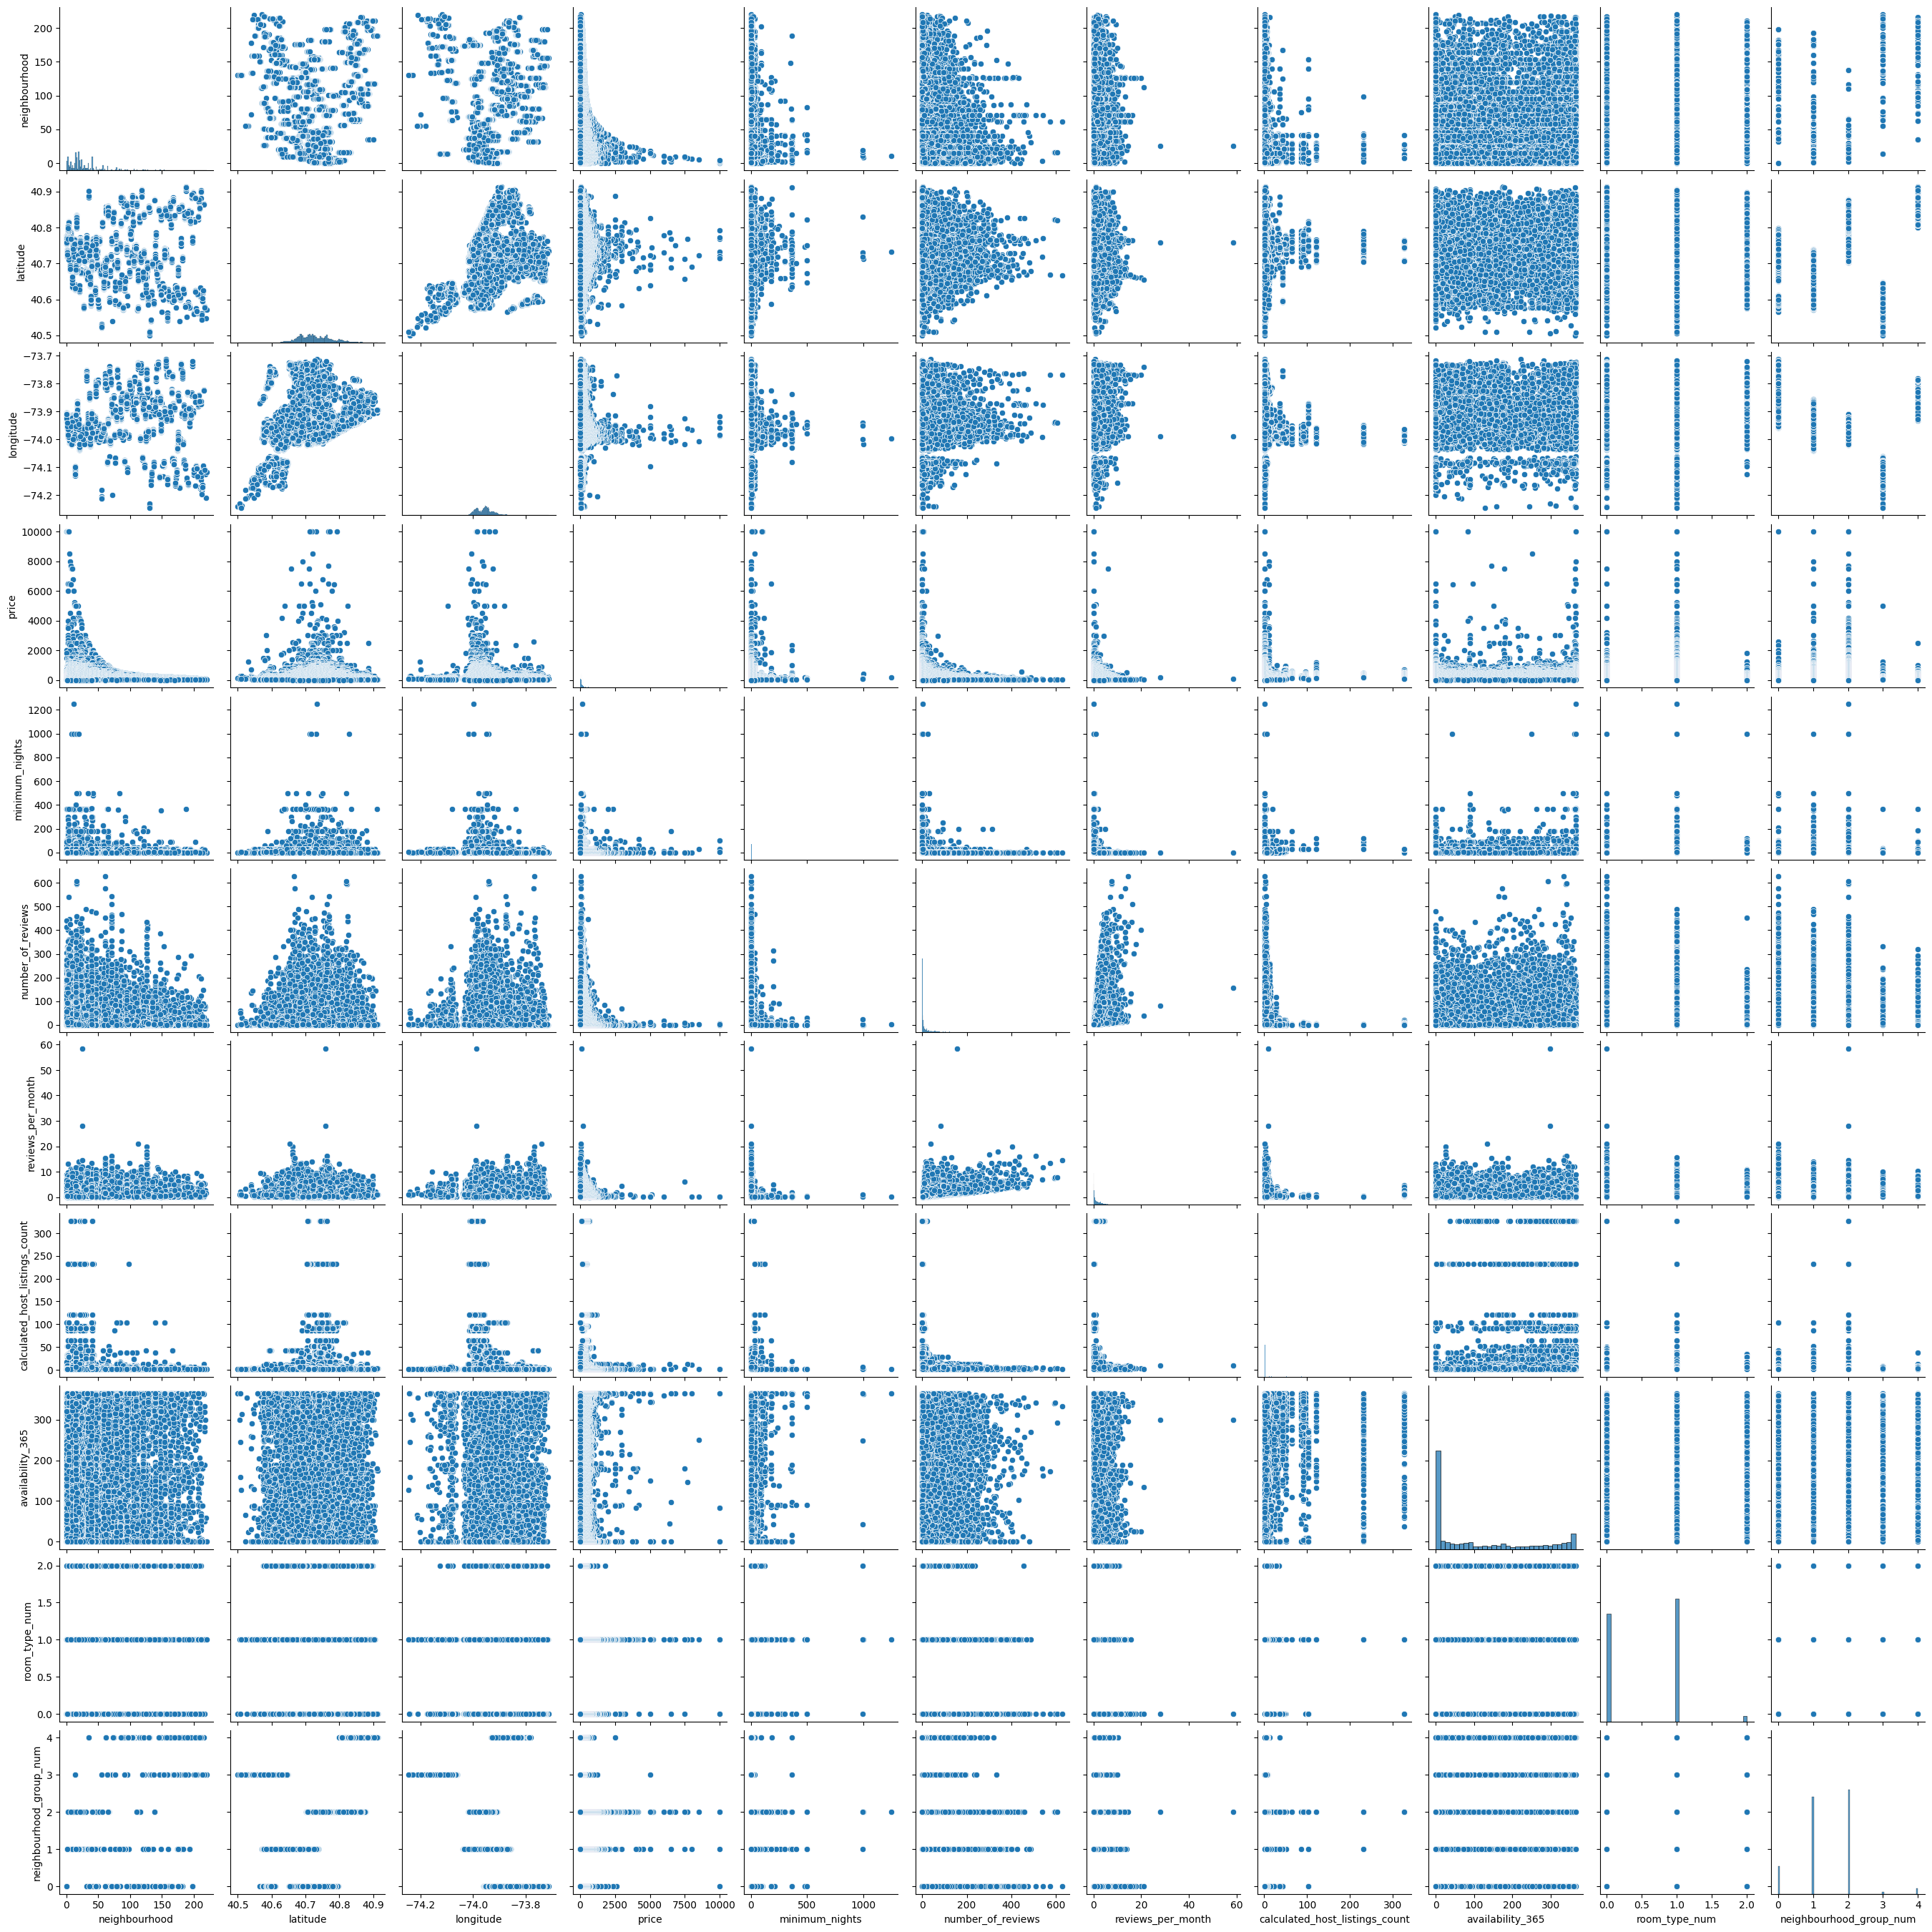

In [35]:
sns.pairplot(data = total_data)

# II. Feature engineering 

## 1. Análisis de outliers

La función .describe() nos permite observar la variabilidad así como los cuartiles de todas las variables. Lo realizamos para tomar apuntes.

In [36]:
total_data.drop(["latitude", "longitude"], axis= 1, inplace = True)
total_data.describe()

,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_num,neighbourhood_group_num
count,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,35.273361,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,0.567113,1.409326
std,37.141136,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,0.541249,0.789106
min,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,13.000000,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000,1.000000
50%,21.000000,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,1.000000,1.000000
75%,41.000000,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.000000,2.000000
max,220.000000,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2.000000,4.000000


Vemos una tremenda variabilidad en el precio, pero de ninguna manera será visto como outlier. Tenenmos que tener en cuenta que la mayoría de la gente no se puede permitir hospedajes de lujo, lo cual no quita que sea una realidad.

En los boxplot abajo dispuesto se observan muchos más posibles outliers. De momento dejaremos el set como está y si el modelo no funcionase bien, voleríamos a este punto a investigar y tomar decisiones.

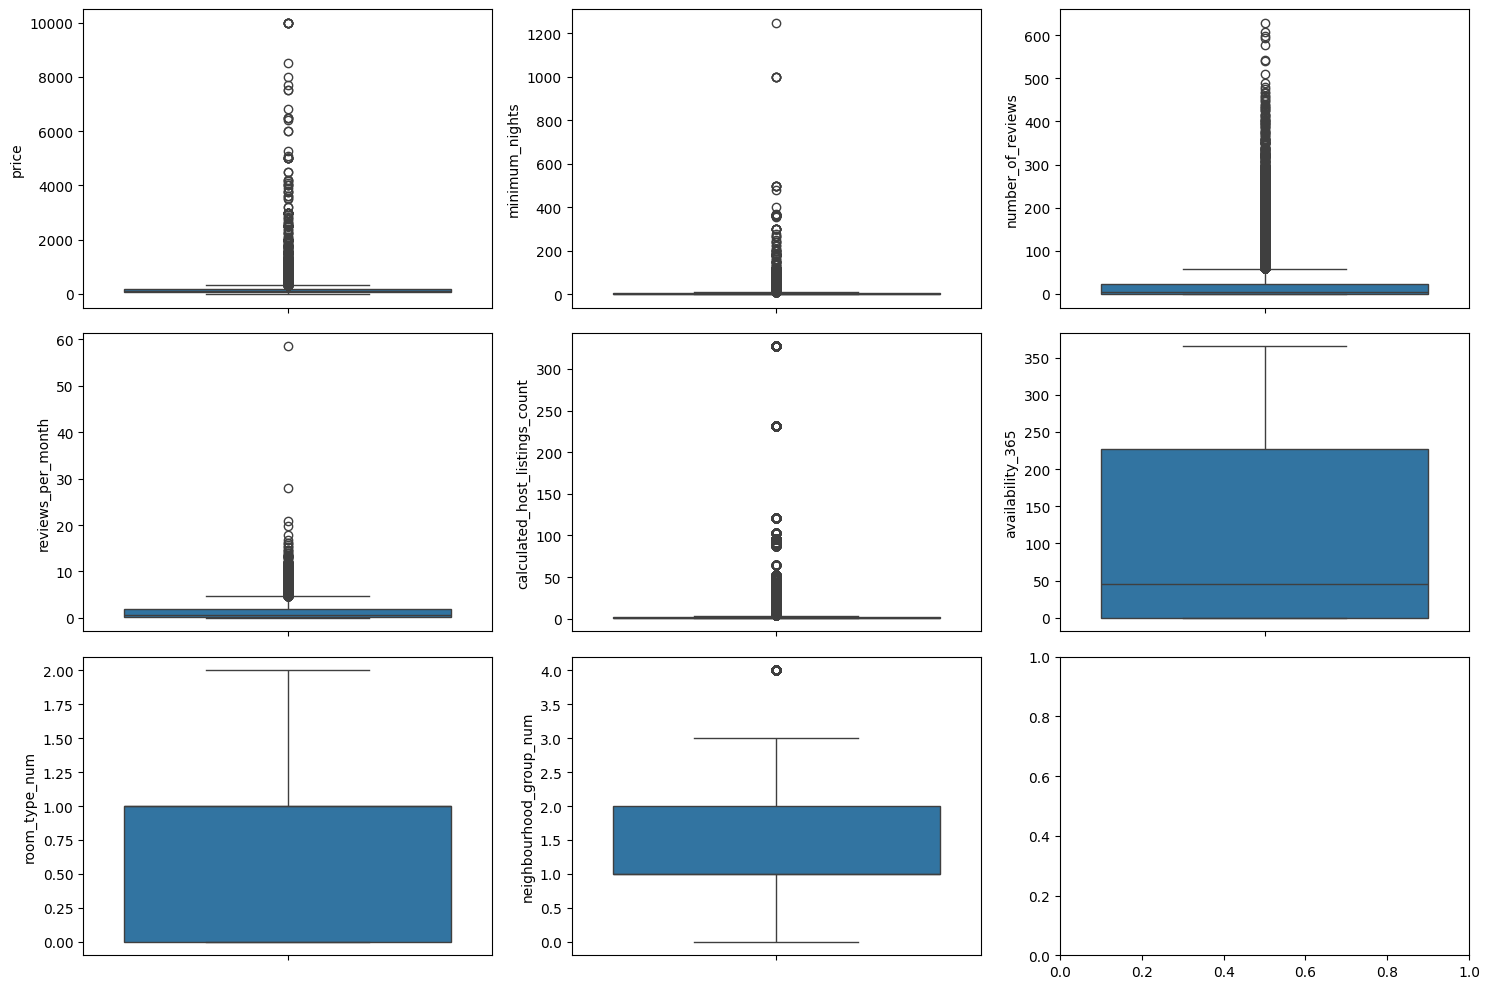

In [37]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "price")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "reviews_per_month")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "availability_365")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "room_type_num")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "neighbourhood_group_num")

plt.tight_layout()


## 2. Análisis de valores faltantes

Vemos el porcentaje de ceros en las columnas para valorar si sustituirlos por medianas de la propia columna y así permitir que el modelo funcione mejor.

In [38]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

reviews_per_month                 0.205583
neighbourhood_group               0.000000
neighbourhood                     0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
room_type_num                     0.000000
neighbourhood_group_num           0.000000
dtype: float64

Determinamos que es oportuno rellenar los valores faltantes con sus medianas en el caso de reseñas mensuales y comprobamos que ahora sí no haya valores nulos en nuestro conjunto.

In [39]:
total_data["reviews_per_month"].fillna(total_data["reviews_per_month"].median(), inplace = True)

total_data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
room_type_num                     0
neighbourhood_group_num           0
dtype: int64

Normalizamos el conjunto de datos para que pueda ser trabajado por el modelo.

In [40]:
from sklearn.preprocessing import StandardScaler

num_variables = ["neighbourhood", "price","minimum_nights",	"number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365",	"room_type_num", "neighbourhood_group_num"]

scaler = StandardScaler()
norm_features = scaler.fit_transform(total_data[num_variables])
total_data_norm = pd.DataFrame(norm_features, index = total_data.index, columns = num_variables)
total_data_norm["price"] = total_data["price"]
total_data_norm.head()



,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_num,neighbourhood_group_num
9151,-0.949721,10000,4.532838,-0.477540,-0.788331,-0.186451,-0.856865,-1.047797,-1.785996
17692,-0.922797,10000,-0.098973,-0.410200,-0.709428,-0.186451,-0.856865,0.799801,-0.518726
29238,-0.895872,10000,1.119925,-0.522433,-0.341211,-0.186451,-0.226266,0.799801,0.748543
40433,-0.868947,9999,1.119925,-0.522433,-0.341211,-0.186451,1.916250,0.799801,0.748543
12342,-0.868947,9999,4.484082,-0.387753,-0.722578,-0.186451,-0.226266,-1.047797,0.748543


Utilizamos f_regression ya que se trata de un problema de tipo numérico y dividimos el set normalizado entre x e y, train y test.

In [41]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split

In [42]:


# We divide the dataset into training and test samples.
X = total_data_norm.drop("price", axis = 1)
y = total_data_norm["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_regression, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,neighbourhood,calculated_host_listings_count,availability_365,room_type_num,neighbourhood_group_num
0,-0.518928,-0.186451,-0.856865,-1.047797,0.748543
1,-0.303531,-0.095410,-0.408608,0.799801,0.748543
2,0.800378,-0.156104,1.597152,0.799801,0.748543
3,0.450358,-0.156104,-0.856865,-1.047797,0.748543
4,-0.303531,-0.186451,-0.856865,0.799801,0.748543


Pasamos X train y X test a listas para finalmente poder exportarlos separadamente en dos .csv. De este modo tenemos ya nuestros Train y Test listos. 

In [43]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)

In [44]:
X_train_sel.to_csv("/workspaces/EDA_1/src/clean_airbnb_train.csv", index=False)
X_test_sel.to_csv("/workspaces/EDA_1/src/clean_airbnb_test.csv", index=False)